In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [3]:
from pyspark import SparkConf
configuration = SparkConf().setAppName('RomeoAndJulietCounter')\
.setMaster('local[*]')

In [4]:
from pyspark import SparkContext
sc = SparkContext(conf=configuration)

In [5]:
from textblob.utils import strip_punc
tokenized = sc.textFile('RomeoAndJuliet.txt')\
.map(lambda line: strip_punc(line, all=True).lower())\
.flatMap(lambda line: line.split())

In [6]:
filtered = tokenized.filter(lambda word: word not in stop_words)

In [7]:
from operator import add
word_counts = filtered.map(lambda word: (word, 1)).reduceByKey(add)

In [8]:
filtered_counts = word_counts.filter(lambda item: item[1] >= 60)

In [9]:
from operator import itemgetter
sorted_items = sorted(filtered_counts.collect(),
key=itemgetter(1), reverse=True)

In [10]:
max_len = max([len(word) for word, count in sorted_items])
for word, count in sorted_items:
    print(f'{word:>{max_len}}: {count}')

   romeo: 302
    thou: 277
  juliet: 182
     thy: 170
   nurse: 146
 capulet: 141
    love: 136
    thee: 135
   shall: 112
    lady: 109
   friar: 104
    come: 95
 project: 89
mercutio: 83
    good: 80
benvolio: 79
   enter: 75
      go: 75
    i’ll: 71
  tybalt: 69
   death: 69
   night: 68
lawrence: 67
     man: 65
    hath: 64
     may: 63
     one: 61


In [11]:
import pandas as pd

In [12]:
data_frame = pd.DataFrame(sorted_items, columns=['word','count'])


In [14]:
data_frame

,word,count
0,romeo,302
1,thou,277
2,juliet,182
3,thy,170
4,nurse,146
5,capulet,141
6,love,136
7,thee,135
8,shall,112
9,lady,109


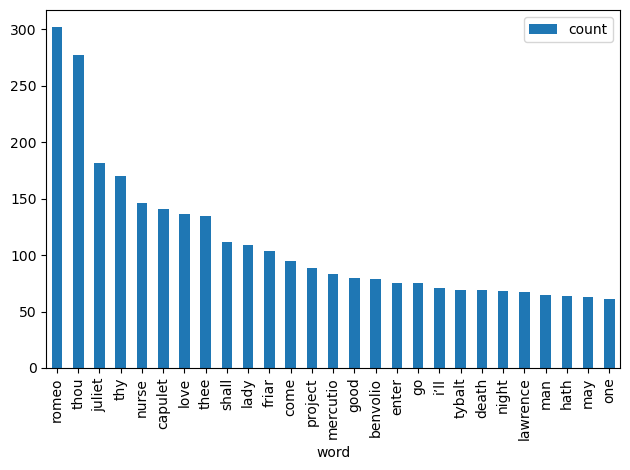

In [15]:
import matplotlib.pyplot as plt
axes = data_frame.plot.bar(x='word', y='count')
plt.gcf().tight_layout() 


In [16]:
import imageio
masked_shape = imageio.v3.imread('mask_star.png')

In [17]:
words_df = pd.DataFrame(word_counts.collect())

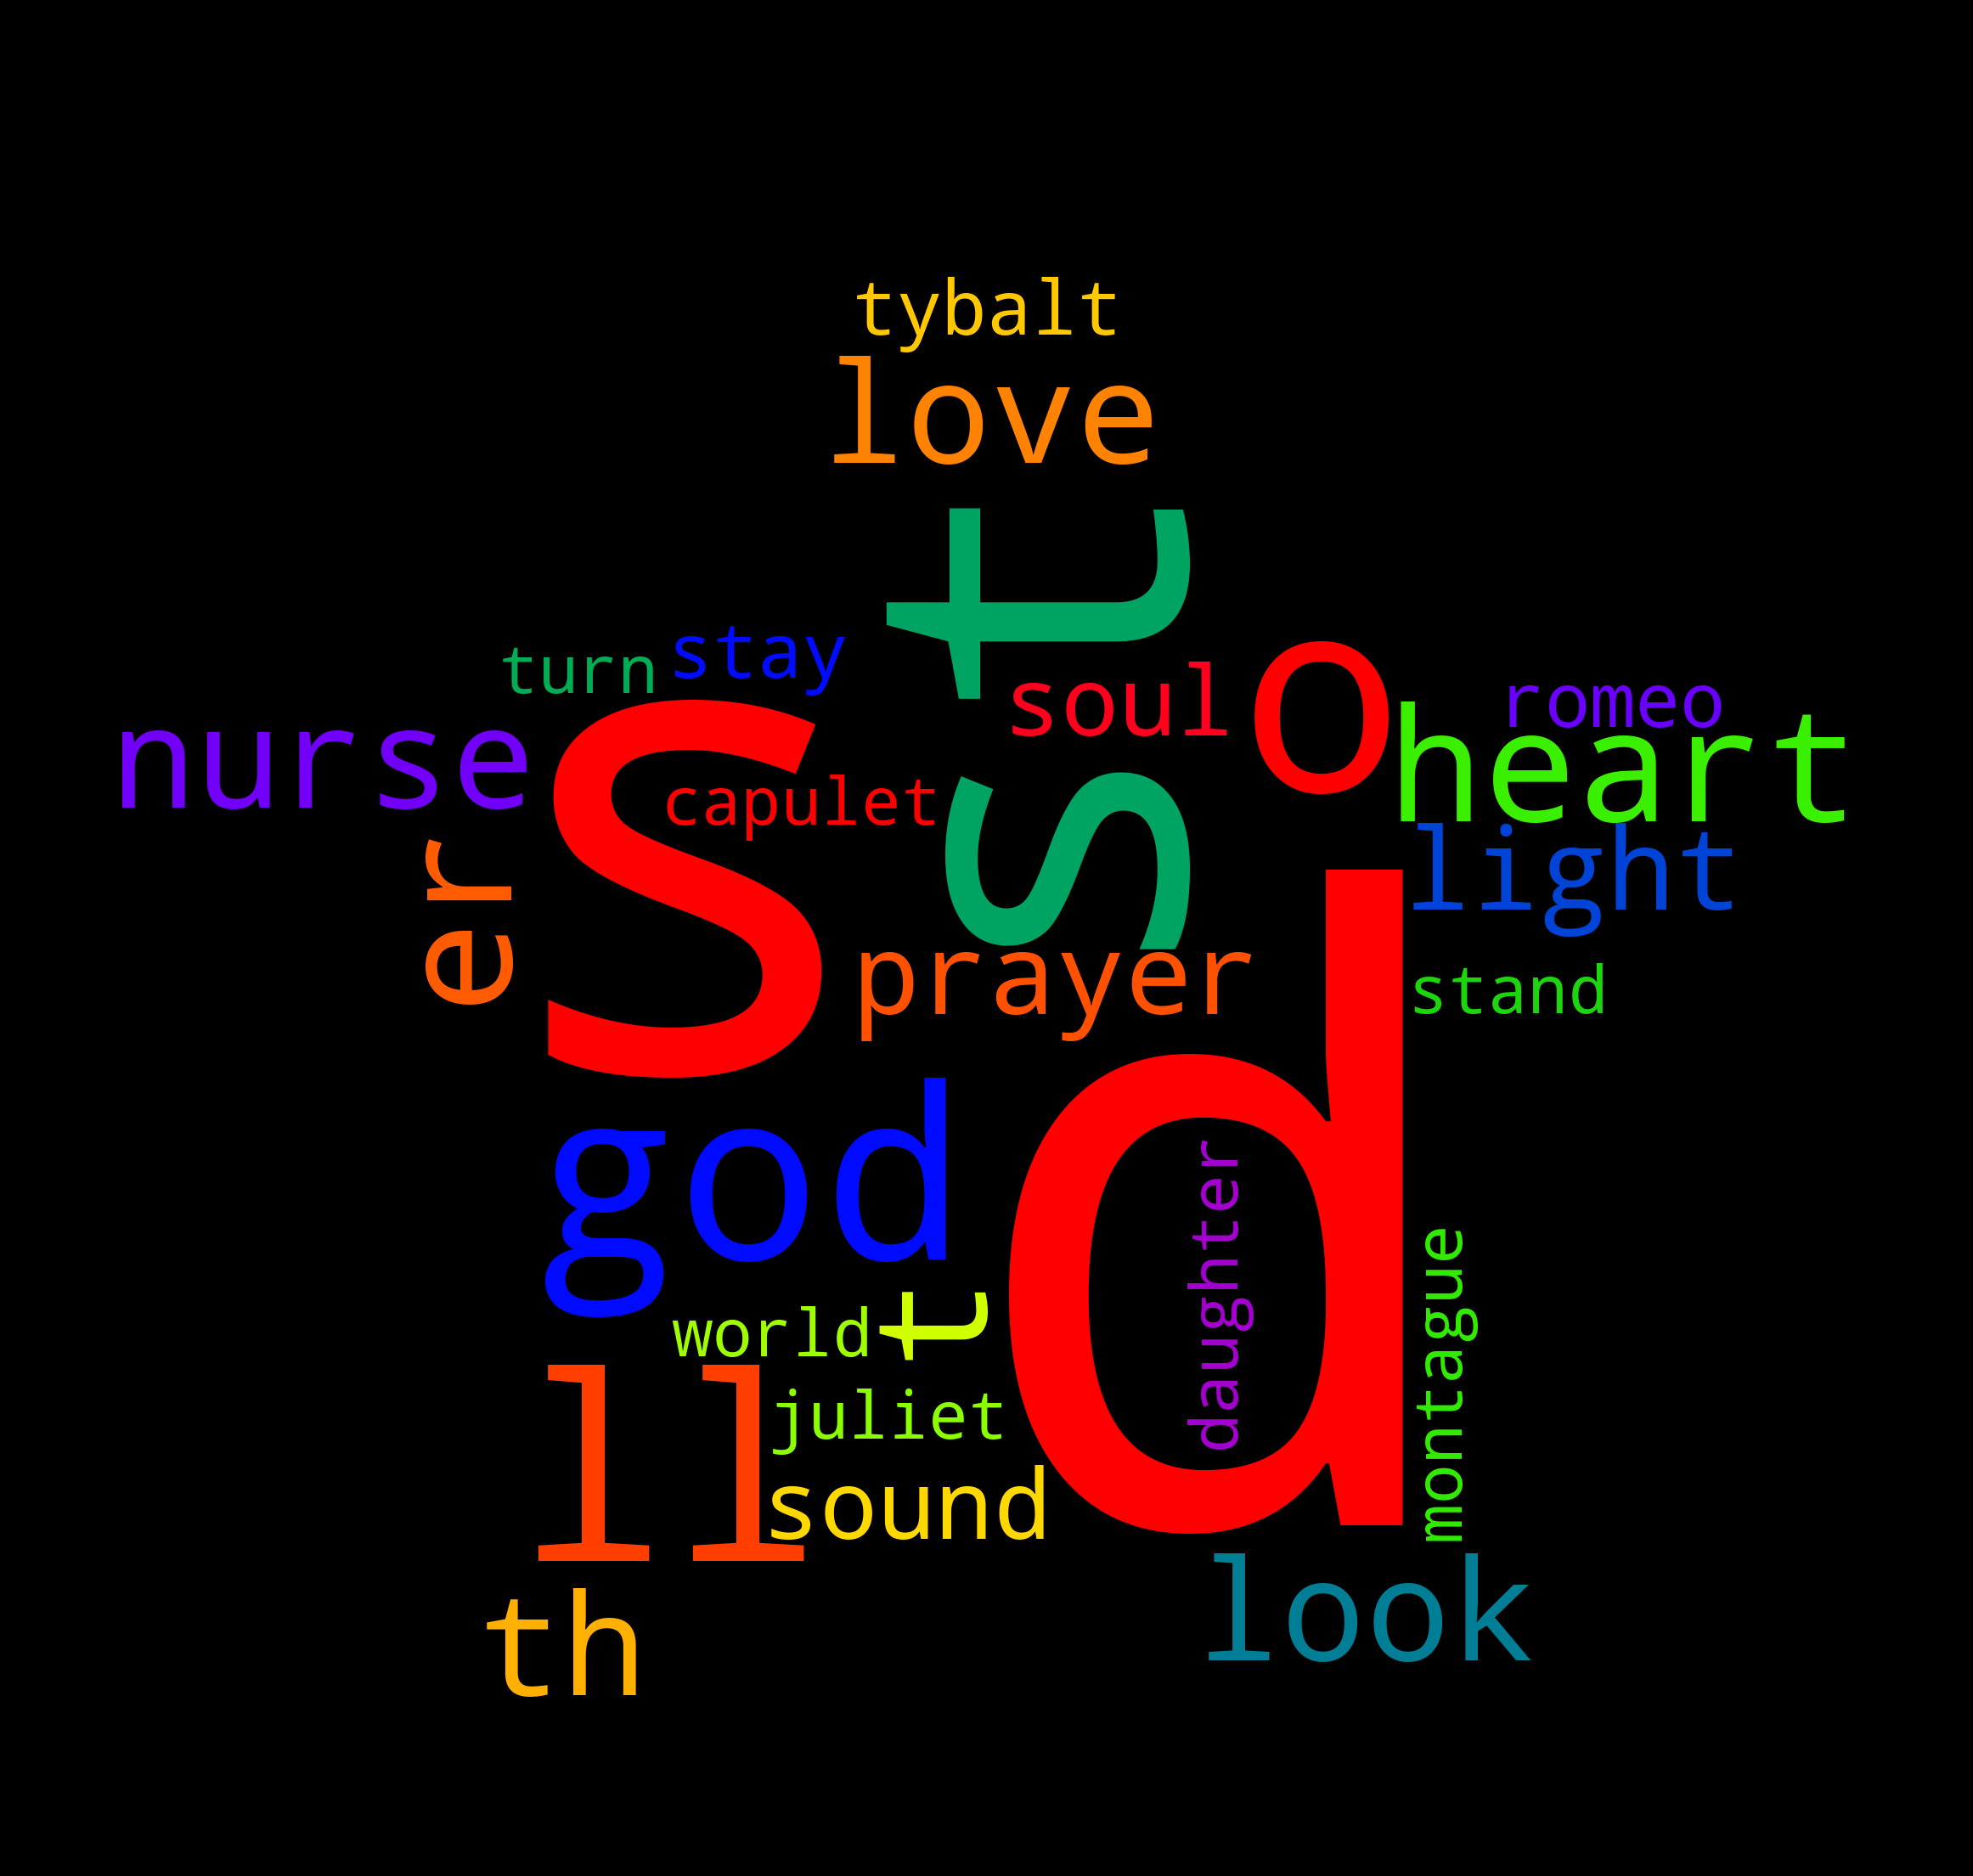

In [19]:
from wordcloud import WordCloud

# generate masked-shaped image of 100 top words from rj_book
WordCloud(width=1000, height=1000, colormap='prism', 
    mask=masked_shape, max_words=27).generate(words_df.to_string()).to_image()